**References:**

House Price Prediction Using Linear Regression (2021) by Simran Kaur https://linuxhint.com/house-price-prediction-linear-regression/

Predicting House Prices with Linear Regression | Machine Learning from Scratch (2019) by Venelin Valkov https://towardsdatascience.com/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac1

Housing Price Prediction Based on Multiple Linear Regression (2021) by Qingqi Zhang
https://www.hindawi.com/journals/sp/2021/7678931/

Predict Housing Prices with Linear Regression using Scikit-Learn (2021) by Robert John https://www.robertthasjohn.com/post/predict-housing-prices-with-linear-regression-using-scikit-learn



Predicting Housing Prices with Linear Regression using Python, pandas, and statsmodels by Tim Dobbins and John Burke https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/


https://studygyaan.com/data-science/linear-regression-machine-learning-project-for-house-price-prediction
https://www.linkedin.com/pulse/linear-regression-housing-data-using-randomized-search-ali-nemati/
Predicting Housing Prices Using Linear Regression (2021) by Stane Aurelius Ronotana
31 August 2021 https://rpubs.com/staneaurelius/house_price_prediction

https://www.jetir.org/papers/JETIR2110302.pdf

Housing Price Prediction ( Linear Regression ) (2019) by Ashish https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression

**Source**

This dataset is obtained from Cam Nugent's page (https://www.kaggle.com/datasets/camnugent/california-housing-prices), a modified version of the California Housing dataset. It is almost identical to the original, with two differences:

207 values were randomly removed from the total_bedrooms column in Cam's analysis.
An additional categorical attribute called ocean_proximity was added, indicating (very roughly) whether each block group is near the ocean, near the Bay area, inland or on an island. This allows discussing what to do with categorical data.
Note that the block groups are called "districts" in the Jupyter notebooks, simply because in some contexts the name "block group" was confusing.


The original dataset may also be downloaded from StatLib mirrors.The dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

For ease of understanding, a block will be called a district in this analysis. 

**Attributes info:**

1. Longitude: A measure of how far west a house is; a higher value is farther west

2. Latitude: A measure of how far north a house is; a higher value is farther north

3. Housing Median Age: Median age of a house within a district; a lower number is a newer building

4. Total Rooms: Total number of rooms within a district

5. Total Bedrooms: Total number of bedrooms within a district

6. Population: Total number of people residing within a district

7. Households: Total number of households, a group of people residing within a home unit, for a district

8. Median Income: Median income for households within a district of houses (measured in tens of thousands of US Dollars)

9. Median House Value: Median house value for households within a district (measured in US Dollars)

10.Ocean Proximity: Location of the house with respect to ocean/sea

Problem 1: Build a regression model to predict "median_house_value".

# Part 1. Exploratory Data Analysis (EDA)

In [18]:
#Libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
df = pd.read_csv("housing.csv")
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [5]:
df.describe().T

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         296.0000     435.0000     647.00000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

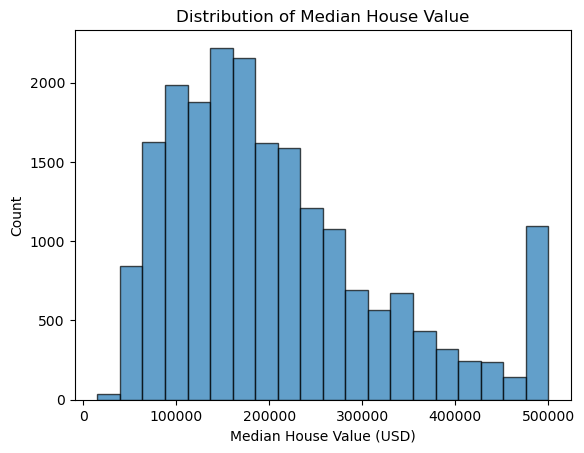

Most of the density lies between $120k and $180k, but there appears to be a lot of outliers (~5% on the pricier side of nearly $500k.


In [4]:
median_house_value = df['median_house_value']

# Create a histogram
plt.hist(median_house_value, bins=20, edgecolor='black', alpha=0.7, label='Histogram')

# Add labels and a legend
plt.xlabel('Median House Value (USD)')
plt.ylabel('Count')
plt.title('Distribution of Median House Value')
#plt.legend()

plt.show()

print('Most of the density lies between $120k and $180k, but there appears to be a lot of outliers (~5% on the pricier side of nearly $500k.')

In [7]:
print ('Correlation to median house value:')
print(df.corr()['median_house_value'].sort_values(ascending=False))

Correlation to median house value:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


C:\Users\chinf\AppData\Local\Temp\ipykernel_2412\1706524538.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()['median_house_value'].sort_values(ascending=False))


C:\Users\chinf\AppData\Local\Temp\ipykernel_2412\1859394998.py:9: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = features.corrwith(target)


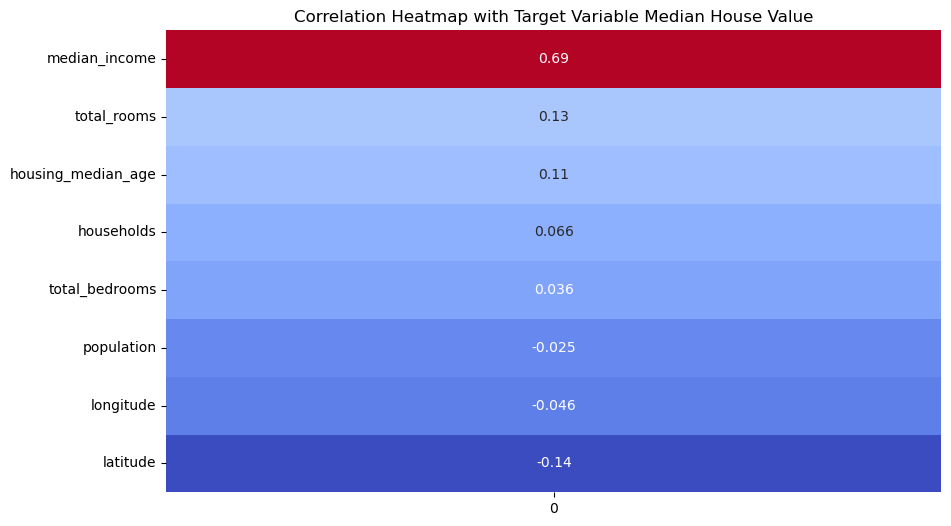

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features and target variable
features = df.drop(columns=['median_house_value'])
target = df['median_house_value']

# Calculate the correlations
correlations = features.corrwith(target)

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sorted_correlations.to_frame(), annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation Heatmap with Target Variable Median House Value")
plt.show()

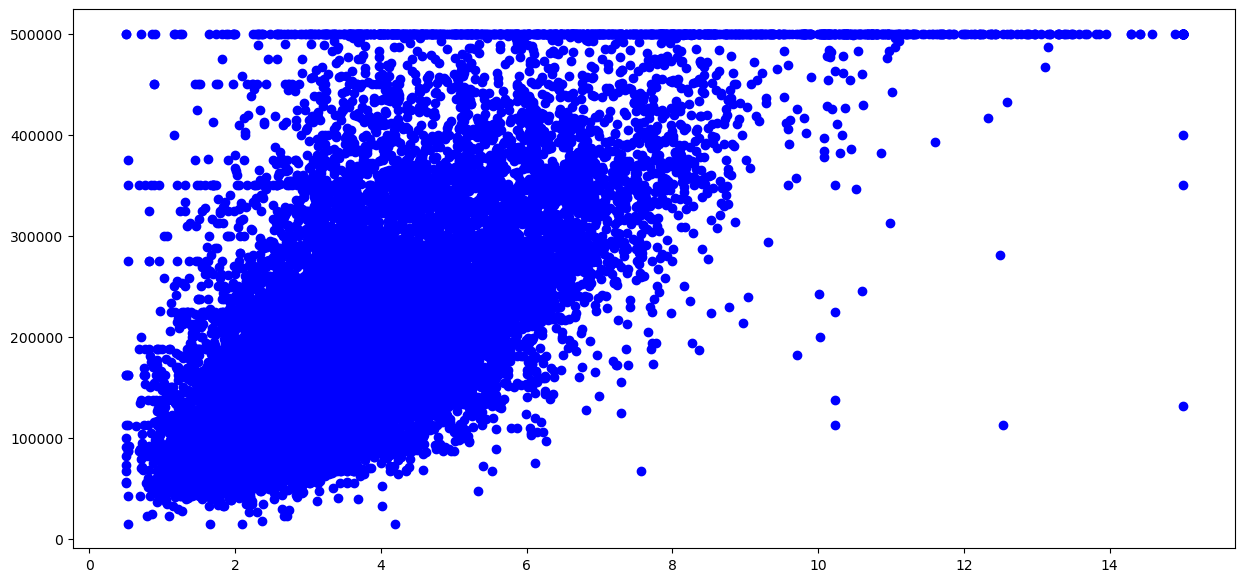

In [12]:
def draw_scatter_plot(X, Y):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')

    plt.show();
    
draw_scatter_plot(df['median_income'], df['median_house_value'])

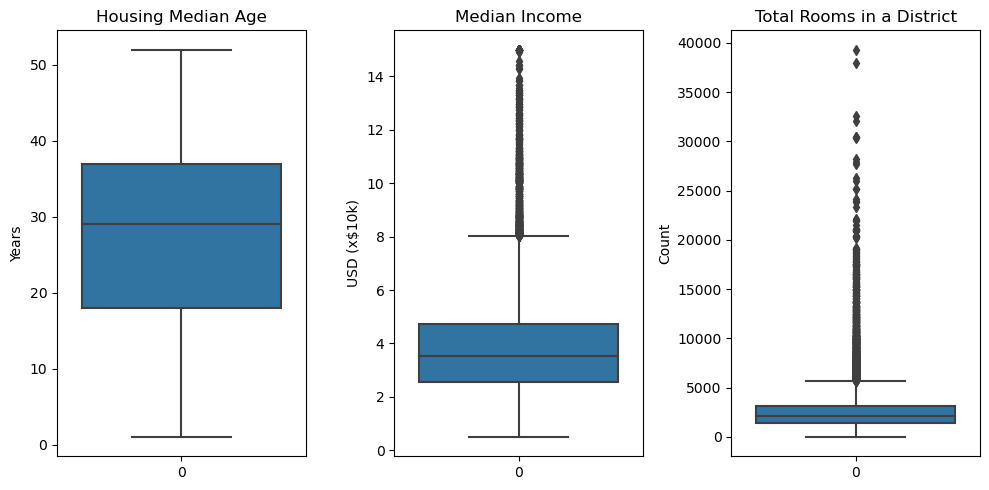

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))  # Adjusted figsize for better visualization

plt1 = sns.boxplot(df['housing_median_age'], ax=axs[0])
plt1.set_title('Housing Median Age')
plt1.set_ylabel('Years')  # Adding y-axis label

plt2 = sns.boxplot(df['median_income'], ax=axs[1])
plt2.set_title('Median Income')
plt2.set_ylabel('USD (x$10k)')  # Adding y-axis label

plt3 = sns.boxplot(df['total_rooms'], ax=axs[2])
plt3.set_title('Total Rooms in a District')
plt3.set_ylabel('Count')  # Adding y-axis label


plt.tight_layout()
plt.show()


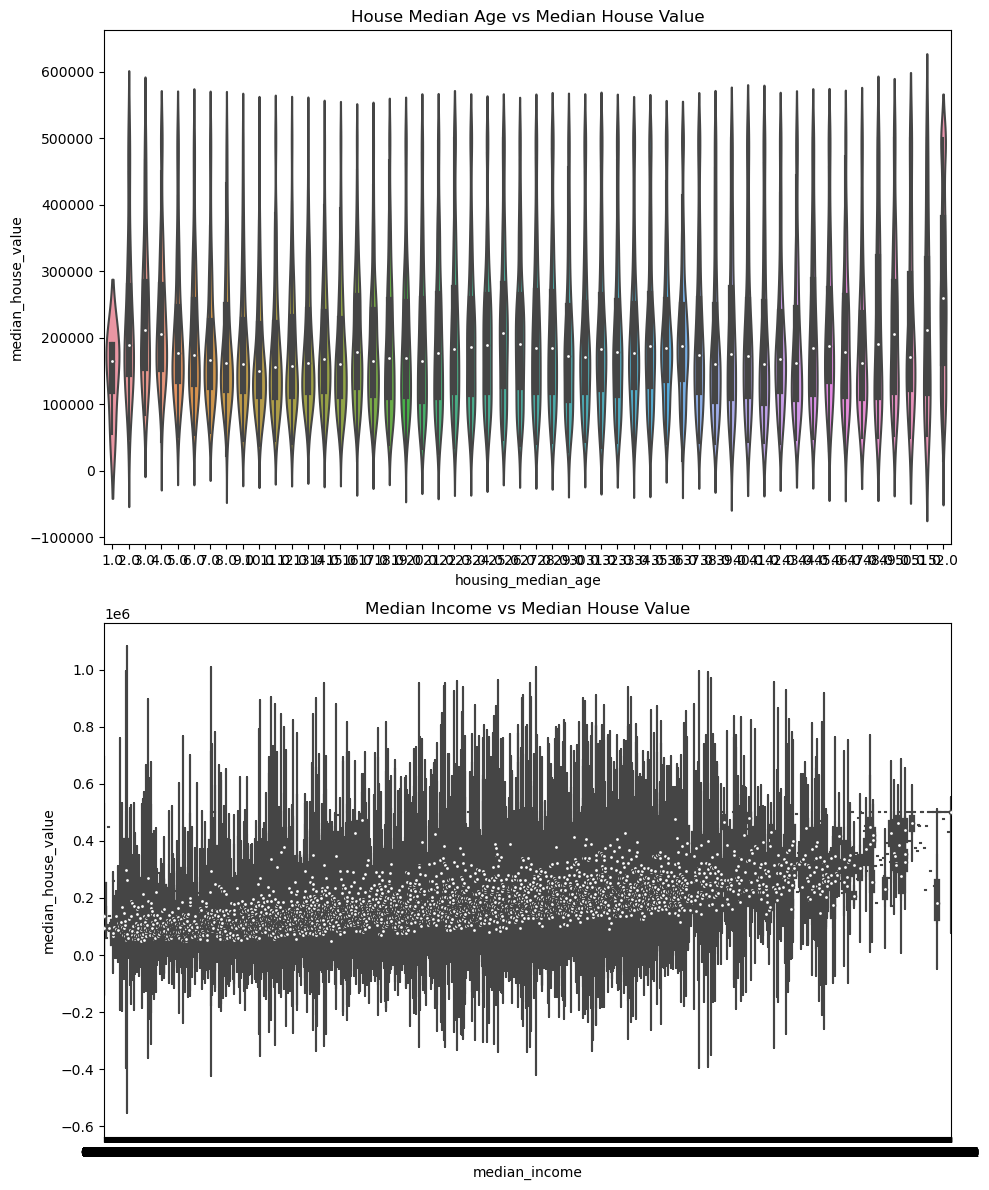

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot 1: House Median Age vs Median House Value
sns.violinplot(x='housing_median_age', y='median_house_value', data=df, ax=axes[0])
axes[0].set_title('House Median Age vs Median House Value')

# Plot 2: Median Income vs Median House Value
sns.violinplot(x='median_income', y='median_house_value', data=df, ax=axes[1])
axes[1].set_title('Median Income vs Median House Value')

# Adjust layout
plt.tight_layout()
plt.show()


In [35]:
import folium
import pandas as pd


# Make an empty map
# 38.575764, -121.478851 is the initial location (assuming these are the coordinates you want)
m = folium.Map(location=[38.575764, -121.478851], zoom_start=10)

# I can add markers one by one on the map
for i in range(0, len(df.head(20640))):
    folium.Marker(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']]
    ).add_to(m)
    
# Display the map
m


# Part 2. Data Cleaning

In [20]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [21]:
#Data source indicates that 207 values were randomly removed from the total_bedrooms column. Hence, current NAN values will be filled randomly. 
# Generate random numbers between 0 and 6445 for the missing values.
np.random.seed(124)
random_numbers = np.random.randint(0, 6446, size=df['total_bedrooms'].isna().sum())

# Replace missing values with the generated random numbers
df.loc[df['total_bedrooms'].isna(), 'total_bedrooms'] = random_numbers

# Part 3. Feature Engineering and Transformation

In [22]:
unique_values = df['ocean_proximity'].unique()
unique_values

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [23]:
#converting categorical to numerical value for analysis
df.replace('ISLAND', '0', inplace=True)
df.replace('NEAR BAY', '1', inplace=True)
df.replace('NEAR OCEAN', '2', inplace=True)
df.replace('<1H OCEAN', '3', inplace=True)
df.replace('INLAND', '4', inplace=True)
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
20635               4  
20636               4  
20637               4  
20638               4  
20639               4  

[20640 rows x 10 columns]

In [24]:
ocean_proximity_counts = df['ocean_proximity'].value_counts()
ocean_proximity_counts

3    9136
4    6551
2    2658
1    2290
0       5
Name: ocean_proximity, dtype: int64

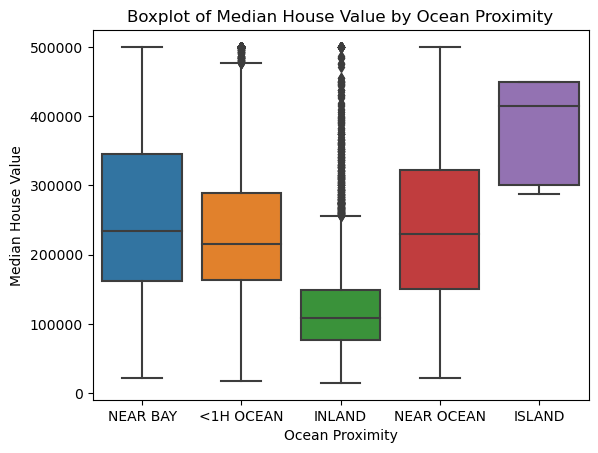

In [25]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)

# Set the x-tick positions and labels using numerical values
x_tick_positions = [0, 1, 2, 3, 4]
legend_labels = ['NEAR BAY','<1H OCEAN', 'INLAND','NEAR OCEAN','ISLAND']

x_tick_labels = legend_labels #2,4,5,3,1
plt.xticks(x_tick_positions, x_tick_labels)

plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.title('Boxplot of Median House Value by Ocean Proximity')

plt.show()

# Part 4. Machine Learning Model Training

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
# Target Variable
y = df['median_house_value']

In [17]:
# chose the feature which are strongly correlated with median house value
predictor_columns = ['total_rooms','median_income']
X = df[predictor_columns]
X.head()

total_rooms  median_income
0        880.0         8.3252
1       7099.0         8.3014
2       1467.0         7.2574
3       1274.0         5.6431
4       1627.0         3.8462

In [18]:
# Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
# Fit and score model on training data
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.4770017561732457

In [22]:
# Score model on test data
lr.score(X_test, y_test)

0.45884251923078034

In [28]:
# Find coefficients
lr_coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': lr.coef_})
lr_coef_df

feature   coefficient
0    total_rooms     -0.180569
1  median_income  41965.550194

In [24]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [25]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    lr.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_preds = lr.predict(X_train)
    test_preds = lr.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(5)])

metrics_df

Training R2   Test R2  Training RMSE     Test RMSE
1     0.475888  0.463495   83250.324003  85642.515640
2     0.473476  0.473348   83694.047950  83890.186709
3     0.471193  0.482427   83902.718839  83055.644176
4     0.472127  0.478603   83701.888495  83862.766659
5     0.474578  0.468327   84111.256227  82206.297770

In [26]:
metrics_df.describe()

Training R2   Test R2  Training RMSE     Test RMSE
count     5.000000  5.000000       5.000000      5.000000
mean      0.473452  0.473240   83732.047103  83731.482191
std       0.001875  0.007620     319.115584   1272.538420
min       0.471193  0.463495   83250.324003  82206.297770
25%       0.472127  0.468327   83694.047950  83055.644176
50%       0.473476  0.473348   83701.888495  83862.766659
75%       0.474578  0.478603   83902.718839  83890.186709
max       0.475888  0.482427   84111.256227  85642.515640

# Part 5. Model Evaluation and Fine-Tuning

In [11]:
##Forward Feature Selection

# define the target variable (dependent variable) as y
y = df['median_house_value']

# Take all columns except target as predictor columns
predictor_columns = [c for c in df.columns if c != 'median_house_value']

# Load the dataset as a pandas data frame
X = pd.DataFrame(df, columns = predictor_columns)

#create training and testing subsets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 1)

# define the target variable (dependent variable) as y
y = df['median_house_value']

# Take all columns except target as predictor columns
predictor_columns = [c for c in df.columns if c != 'median_house_value']

# Load the dataset as a pandas data frame
X = pd.DataFrame(df, columns = predictor_columns)

# Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Flag intermediate output
show_steps = True

In [22]:
X_train.shape[0]

16512

In [40]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
## Using Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])
    
    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = ocean_proximity, total_bedrooms, housing_median_age, latitude, longitude, median_income, population, total_rooms, households
(Step) Trying ocean_proximity...
(Step) - Features = ocean_proximity
(Step) - Adjusted R^2: This = 0.159; Best = 0.000
(Step) - New Best!   : Feature = ocean_proximity; R^2 = 0.159; Adjusted R^2 = 0.159
(Step) Trying total_bedrooms...
(Step) - Features = total_bedrooms
(Step) - Adjusted R^2: This = 0.001; Best = 0.159
(Step) Trying housing_median_age...
(Step) - Features = housing_median_age
(Step) - Adjusted R^2: This = 0.011; Best = 0.159
(Step) Trying latitude...
(Step) - Features = latitude
(Step) - Adjusted R^2: This = 0.021; Best = 0.159
(Step) Trying longitude...
(Step) - Features = longitude
(Step) - Adjusted R^2: This = 0.002; Best = 0.159
(Step) Trying median_income...
(Step) - Features = median_income
(Step) - Adjusted R^2: This = 0.476; Best = 0.159
(Step) - New Best!   : Feature = median_income; R^2 = 0.476; Adjusted R^2 = 0.476
(S

In [13]:
import pickle #after model.fit

#saving as pickle model
with open('houseprice_model.pkl', 'wb') as file:
    pickle.dump(model, file)

Best R^2 = 0.637; Adjusted R^2 = 0.637

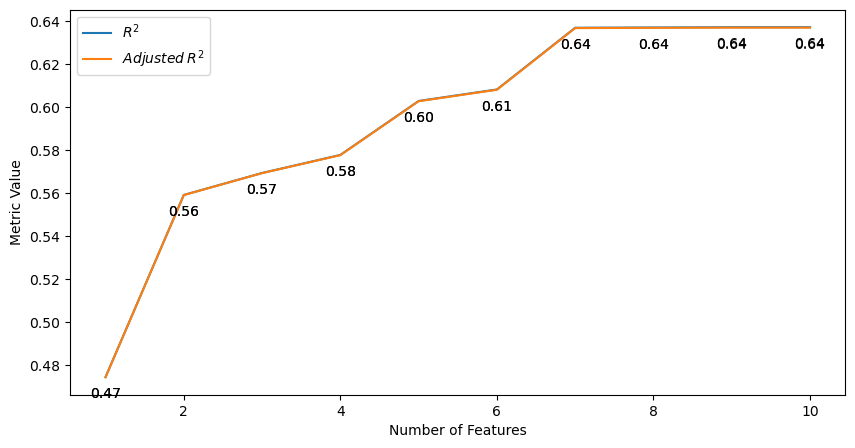

In [26]:
## Chart both R^2 and Adjusted R^2

_range = range(1, len(r2_list)+1)

# define chart size
plt.figure(figsize = (10, 5))

# plot each metric 
plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')

# Add annotations for R² values
for i, r2_value in enumerate(r2_list):
    plt.annotate(f'{r2_value:.2f}', (_range[i], r2_value), textcoords="offset points", xytext=(0,-15), ha='center')

# Add annotations for Adjusted R² values
for i, adjusted_r2_value in enumerate(adjusted_r2_list):
    plt.annotate(f'{adjusted_r2_value:.2f}', (_range[i], adjusted_r2_value), textcoords="offset points", xytext=(0,-15), ha='center')
   
    
# add some better visualisation
plt.xlabel('Number of Features')
plt.ylabel('Metric Value')
plt.legend()

plt.show()


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#included = median_income, ocean_proximity, housing_median_age, latitude, longitude, households, population, total_rooms, total_bedrooms
included = [c for c in df.columns if c != 'median_house_value']
# Fit the final model with the selected features
final_model = LinearRegression().fit(X_train[included], y_train)

# Make predictions using the final model
y_pred = final_model.predict(X_test[included])

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Absolute Error (MAE): 51746.67
Mean Squared Error (MSE): 4974115585.68
Root Mean Squared Error (RMSE): 70527.41
R-squared (R2): 0.63


Explanation: 

Mean Absolute Error (MAE): The MAE is the average absolute difference between the predicted values and the actual values. In this case, the MAE of approximately 51746.67 means that, on average, the model's predictions are off by around $51746.67 in terms of median house value.

Mean Squared Error (MSE): The MSE is the average of the squared differences between the predicted values and the actual values. The MSE value of around 4974115585.68 is quite large, suggesting that the model's predictions have relatively large errors.

Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE. It provides a similar measure of prediction error, but it's in the same units as the target variable. The RMSE of approximately 70527.41 indicates that, on average, the predictions are off by around $70527.41 in terms of median house value.

R-squared (R²): R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. The R² value of 0.63 suggests that the model explains about 63% of the variability in the target variable. This means that the model is capturing a significant portion of the underlying patterns, but there's room for improvement.

In [44]:
#Testing the model
# Select the same set of features for testing that were used for training
X_test_selected = X_test[included]

# Score model on test data
model_score = model.score(X_test_selected, y_test)
print("Model R^2 Score on Test Data:", model_score)

Model R^2 Score on Test Data: 0.6305862390749293


In [45]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    lr.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_preds = lr.predict(X_train)
    test_preds = lr.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(5)])

metrics_df

Training R2   Test R2  Training RMSE     Test RMSE
1     0.635251  0.638116   69530.642205  70043.796111
2     0.640800  0.613917   69178.226996  71616.559595
3     0.641102  0.613560   69376.904635  70674.581745
4     0.631952  0.651167   70009.771739  68134.530496
5     0.630981  0.654823   69981.333296  68242.216508

In [46]:
metrics_df.describe()

Training R2   Test R2  Training RMSE     Test RMSE
count     5.000000  5.000000       5.000000      5.000000
mean      0.636017  0.634316   69615.375774  69742.336891
std       0.004775  0.019785     368.992006   1525.456607
min       0.630981  0.613560   69178.226996  68134.530496
25%       0.631952  0.613917   69376.904635  68242.216508
50%       0.635251  0.638116   69530.642205  70043.796111
75%       0.640800  0.651167   69981.333296  70674.581745
max       0.641102  0.654823   70009.771739  71616.559595

**References:**

https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression
https://linuxhint.com/house-price-prediction-linear-regression/
https://towardsdatascience.com/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac1
https://www.robertthasjohn.com/post/predict-housing-prices-with-linear-regression-using-scikit-learn
https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
https://www.hindawi.com/journals/sp/2021/7678931/
https://studygyaan.com/data-science/linear-regression-machine-learning-project-for-house-price-prediction
https://www.linkedin.com/pulse/linear-regression-housing-data-using-randomized-search-ali-nemati/
https://rpubs.com/staneaurelius/house_price_prediction
https://www.jetir.org/papers/JETIR2110302.pdf

**Further ways to potentially improve model performance:**

Feature Engineering: Experiment with creating new features that might better capture the underlying relationships in the data. This could involve combining existing features, creating interaction terms, or transforming variables.

Feature Selection: Instead of using forward feature selection, consider using techniques like Lasso regression or Ridge regression, which perform automatic feature selection by penalizing irrelevant features.

Model Complexity: Experiment with more complex models, such as polynomial regression or more advanced techniques like decision trees, random forests, or gradient boosting.

Data Quality: Check for outliers and anomalies in your data. Cleaning the data and handling outliers can improve the model's accuracy.

Cross-Validation: Use cross-validation to get a more robust estimate of your model's performance on unseen data.

Regularization: Apply regularization techniques like L1 (Lasso) or L2 (Ridge) regularization to prevent overfitting and improve generalization.

Hyperparameter Tuning: If you're using models with hyperparameters, like regularization strength, try different values to find the optimal configuration.